# Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [2]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Cargar el dataset
titanic_data = pd.read_csv('./Titanic-Dataset.csv')

In [6]:
# Realizamos lectura de los Datos para el análisis exploratorio
titanic_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
# Informacion general del dataset
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# Numeor de filas y columnas
titanic_data.shape

(891, 12)

In [12]:
# Descripción de los datos
titanic_data.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [14]:
# Valores faltantes 
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# Valores duplicados 
titanic_data.duplicated().sum()

0

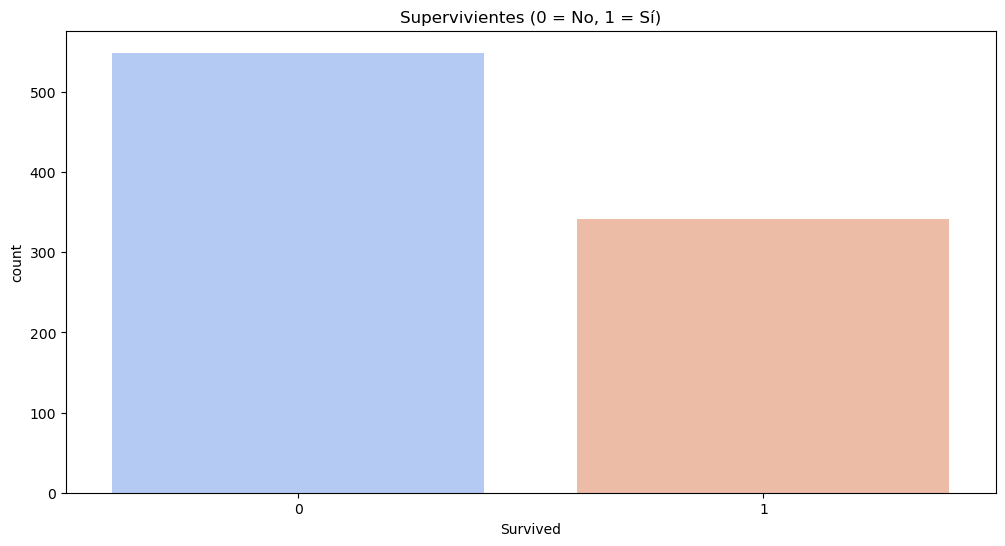

In [63]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Survived', data=titanic_data, palette='coolwarm')
plt.title('Supervivientes (0 = No, 1 = Sí)')
plt.show()

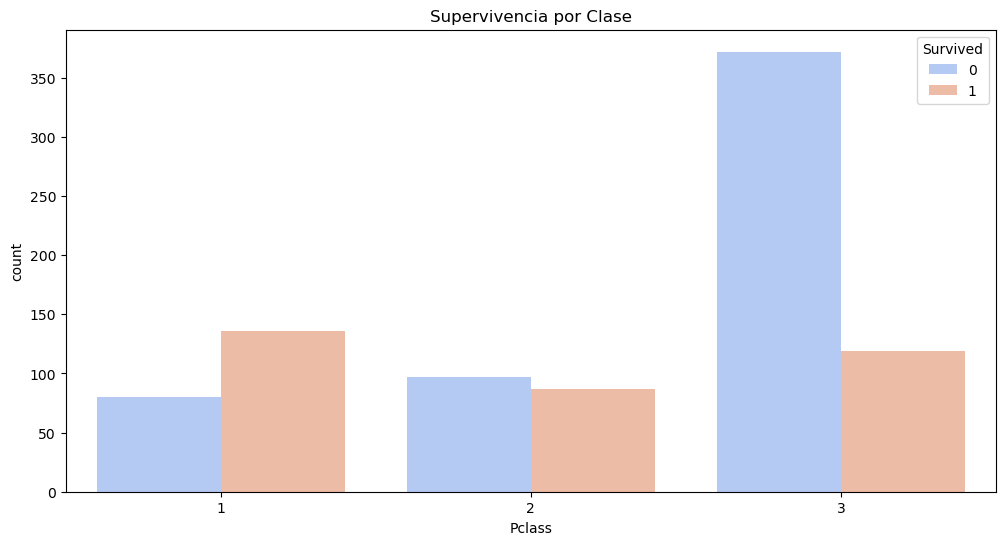

In [65]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic_data, palette='coolwarm')
plt.title('Supervivencia por Clase')
plt.show()

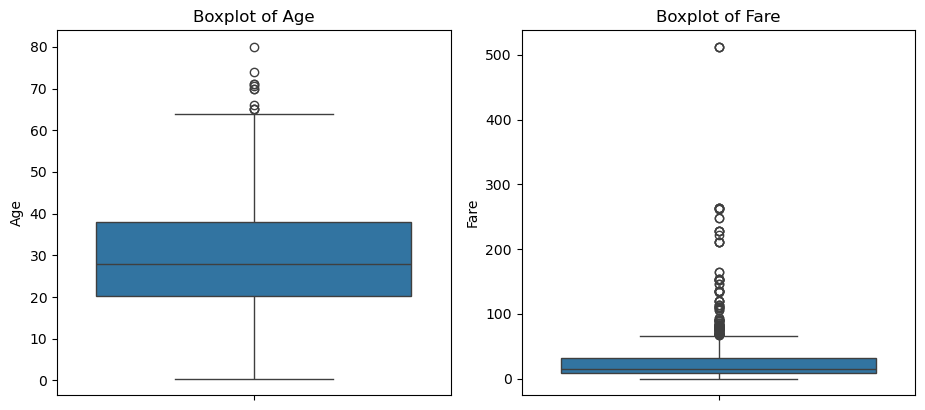

In [18]:
# Boxplots para detectar outliers en columnas numericas
num_cols = ['Age', 'Fare']

plt.figure(figsize=(14, 8))

for i, feature in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(titanic_data[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

# Preprocesamiento de datos y Selección de características

Características de interes: 
- Survived
- Pclass
- Sex
- Age
- SibSp
- Parch
- Fare
- Embarked


In [22]:
# Para tratar los valores faltantes de la columna edad utilizare la mediana
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)


# Para tratar los valores faltantes en la columna Embarked utilizare la moda
titanic_data['Embarked'].fillna('S', inplace=True)

In [24]:
# Voy a eliminar las columnas PassengerId, Name, Cabin y Tiken ya que estas no me sirve para mi analisis  
titanic_data.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'], inplace=True)

In [26]:
# Con esto hemos tratado los valores faltantes 
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [28]:
# Convertir el genero en 0 y 1
titanic_data['Sex']=titanic_data['Sex'].replace({'male':1,'female':0})
# Reemplaza los valores categóricos de la columna 'Embarked' con valores numéricos (S=1, C=2, Q=3) 
titanic_data['Embarked']=titanic_data['Embarked'].replace({'S':1,'C':2,'Q':3})


In [30]:
# Observemos que estos cambios se realizar exitosamente 
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [32]:
# Seleccion de caracteristicas
x=titanic_data.drop(columns=['Survived'])
y=titanic_data['Survived']

In [34]:
# escalar nuestros datos 
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [36]:
# Convierte la variable dependiente 'y' de una pandas Series a un array NumPy bidimensional (vector columna), 
# asegurando la forma adecuada para su uso en modelos de machine learning.
y=y.values.reshape(-1,1)

# Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [44]:
# La función train_test_split divide el conjunto de datos en dos bloques: uno para entrenamiento (train) y otro para prueba (test).
# Proporción de datos: 80% para entrenamiento y 20% para prueba.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

# Entrenar el modelo configurando los diferentes hiperparámetros

In [46]:
# Crea un modelo de regresión logística con regularización L2 para prevenir el sobreajuste,
# estableciendo un máximo de 1000 iteraciones y utilizando el solver 'lbfgs' para la optimización.
# Luego, entrena el modelo con los datos de entrenamiento (X_train, y_train).
lg=LogisticRegression(penalty="l2",max_iter=1000,solver="lbfgs")
lg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [48]:
# Crea el modelo de prediccion
y_pred=lg.predict(X_test)

# Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

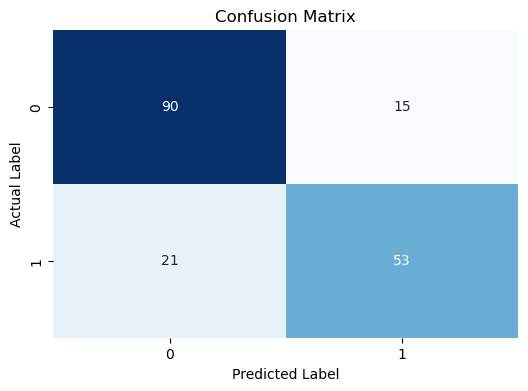

In [53]:
#Matrix de Confusión del modelo
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

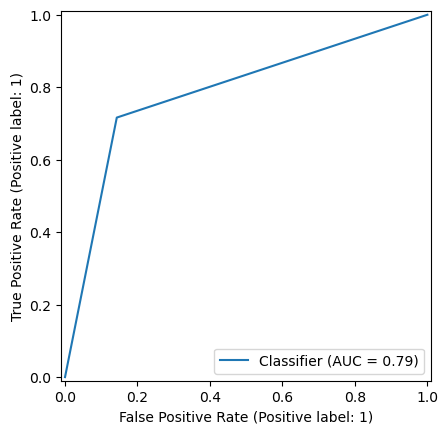

In [55]:
# Curva de precisón del modelo
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

# Interpretar, analizar y documentar los resultados obtenidos

Del desempeño del modelo se puede describir: 

- Precisión: El modelo muestra una precisión del 81% para la clase "no sobrevivió" (0), lo que significa que identifica correctamente a 81 de cada 100 pasajeros predichos como no sobrevivientes, reflejando un buen desempeño en esta categoría. Por otro lado, para la clase "sobrevivió" (1), la precisión es del 78%, lo que indica que, de cada 100 pasajeros predichos como sobrevivientes, 78 fueron identificados correctamente. Aunque esta precisión es ligeramente menor que para la clase "no sobrevivió", sigue siendo aceptable y muestra un desempeño razonable en ambas clases.

- Recall: El modelo tiene un recall del 86% para la clase "no sobrevivió" (0), lo que indica que identifica correctamente al 86% de los pasajeros que realmente no sobrevivieron. Para la clase "sobrevivió" (1), el recall es del 72%, lo que significa que el modelo detecta correctamente al 72% de los pasajeros que realmente sobrevivieron. Esto muestra que el modelo es más eficaz en identificar a los pasajeros que no sobrevivieron, aunque sigue teniendo un desempeño aceptable para aquellos que sí lo hicieron.

- F1-score: El modelo tiene un F1-score del 83% para la clase "no sobrevivió" (0), lo que refleja un buen equilibrio entre precisión y recall, demostrando que es confiable para identificar correctamente a los pasajeros que no sobrevivieron. Para la clase "sobrevivió" (1), el F1-score es del 75%, lo que también representa un equilibrio razonable entre precisión y recall, aunque es algo inferior al de la clase "no sobrevivió"

De la matriz de confusión podemos interpretar:
- La matriz de confusión revela que el modelo tiene un mejor desempeño al identificar pasajeros que no sobrevivieron (Clase 0), con 90 predicciones correctas y solo 15 falsos positivos. En cuanto a los pasajeros que sobrevivieron (Clase 1), el modelo identificó correctamente a 53, aunque cometió 21 errores clasificándolos como no sobrevivientes. Esto indica que el modelo es más preciso para predecir la clase "no sobrevivió", pero tiene un desempeño razonable para la clase "sobrevivió", con una ligera tendencia a favorecer predicciones de "no sobrevivió".

De la curva de precisión del modelo se puede interpretar:

- La curva ROC del modelo muestra un desempeño sólido con un AUC de 0.79, lo que indica que el modelo tiene un 79% de probabilidad de diferenciar correctamente entre pasajeros que sobrevivieron y los que no sobrevivieron. Esto refleja un buen balance entre la Tasa de Verdaderos Positivos (sensibilidad) y la Tasa de Falsos Positivos, ya que la curva está significativamente por encima de la diagonal, demostrando que el modelo supera a un clasificador aleatorio. Sin embargo, existe margen para mejorar su capacidad de clasificación, especialmente en la identificación de casos positivos (sobrevivientes).